<a href="https://colab.research.google.com/github/bpak1297/Data/blob/main/Fall2021_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
install.packages("GGally")
install.packages("ggplot2")
install.packages("car")
install.packages("MASS")
install.packages("olsrr")

library(olsrr)
library(ggplot2)
library(GGally)
library(car)
library(MASS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘goftest’, ‘gridExtra’, ‘nortest’



Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: carData


Attaching

## Set Global Plot Sizes

In [12]:
options(repr.plot.width=20, repr.plot.height=10)

## Load Data:

First step is to upload the dataset into your GitHub, then get the `raw` data link and copy below:

In [63]:
# If .csv:

data <- read.csv('https://raw.githubusercontent.com/bpak1297/Data-Analytics/main/data_file%20(2).csv', header=TRUE) 

In [38]:
# If .txt:

# data <- read.table('link', header=TRUE)

## View Data Frame:

In [84]:
head(data)

,School,Enrollment,Cost.Pupil,AveTeach.,SATV,SATM,SATPartRate,X10GMCASEng,X10GMCASMth,S.TRatio,S.CounselRatio,DropoutRate
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,1,563,7243,45833,507,503,0.78,242,242,11,188,1.5
2,2,1490,6720,49260,587,603,0.91,253,256,17,213,0.1
3,3,1056,8070,47871,534,567,0.95,248,249,11,211,1.6
4,4,796,6385,38913,505,498,0.75,242,241,16,265,1.5
5,5,1626,6694,49402,544,575,0.94,245,248,14,232,0.7
6,6,1059,7688,45039,526,535,0.91,246,245,12,267,1.2


In [85]:
# Look at summary statistics for each column.


summary(data)

     School        Enrollment     Cost.Pupil      AveTeach.          SATV      
 Min.   :  1.0   Min.   : 266   Min.   : 4675   Min.   :32067   Min.   :387.0  
 1st Qu.: 34.5   1st Qu.: 749   1st Qu.: 6285   1st Qu.:44860   1st Qu.:491.0  
 Median : 68.0   Median : 998   Median : 6778   Median :47015   Median :516.0  
 Mean   : 68.0   Mean   :1103   Mean   : 7112   Mean   :46963   Mean   :512.6  
 3rd Qu.:101.5   3rd Qu.:1316   3rd Qu.: 7748   3rd Qu.:49418   3rd Qu.:539.0  
 Max.   :135.0   Max.   :3945   Max.   :12586   Max.   :66654   Max.   :609.0  
      SATM        SATPartRate      X10GMCASEng     X10GMCASMth   
 Min.   :381.0   Min.   :0.4500   Min.   :223.0   Min.   :221.0  
 1st Qu.:485.5   1st Qu.:0.7500   1st Qu.:238.0   1st Qu.:237.0  
 Median :518.0   Median :0.8200   Median :244.0   Median :242.0  
 Mean   :518.3   Mean   :0.8079   Mean   :243.4   Mean   :241.8  
 3rd Qu.:541.5   3rd Qu.:0.9200   3rd Qu.:249.0   3rd Qu.:248.0  
 Max.   :617.0   Max.   :1.0000   Max.   :25

## Look at Pairs Plots

In [86]:
# remove unwanted variables and store regression dataset as dat
dat <- data[, !(names(data) %in% c('School'))]

In [87]:
plot_pairs <- function(dat, yvar) {
    
    ncols <- ncol(dat)  # number of variables in dataset
    
    # loop through columns to graph scatterplots
    for (i in 1:ncols) {
        
        plot(dat[,i], dat[, yvar], 
             xlab = names(dat)[i], ylab = yvar, 
             cex.lab = 2, cex.axis = 2)
        
        # add lowess line for non-factor/non-character variables
        if (!(class(dat[,i]) %in% c('factor', 'character'))) {
            lines(lowess(dat[,i], dat[, yvar]))
        }
        
    }  # end loop
}  # end function


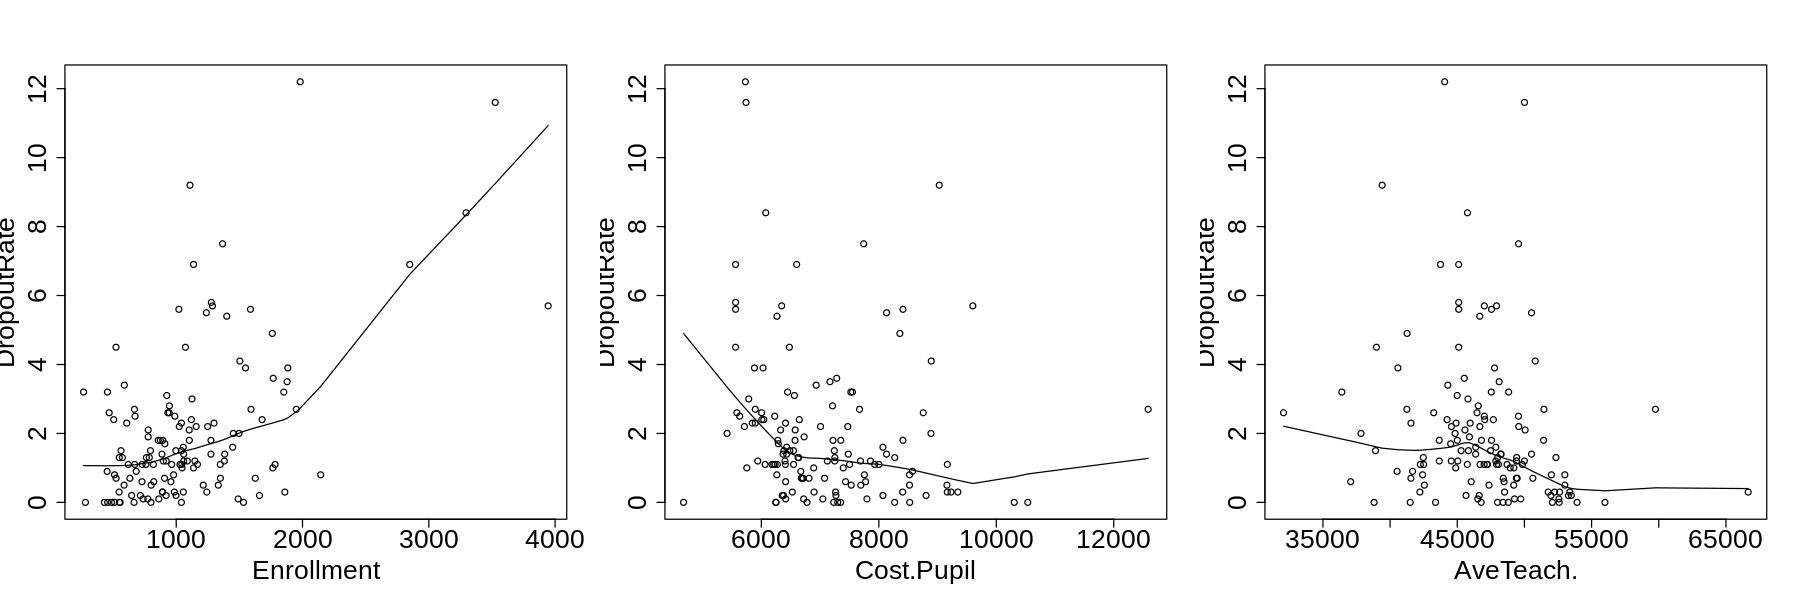

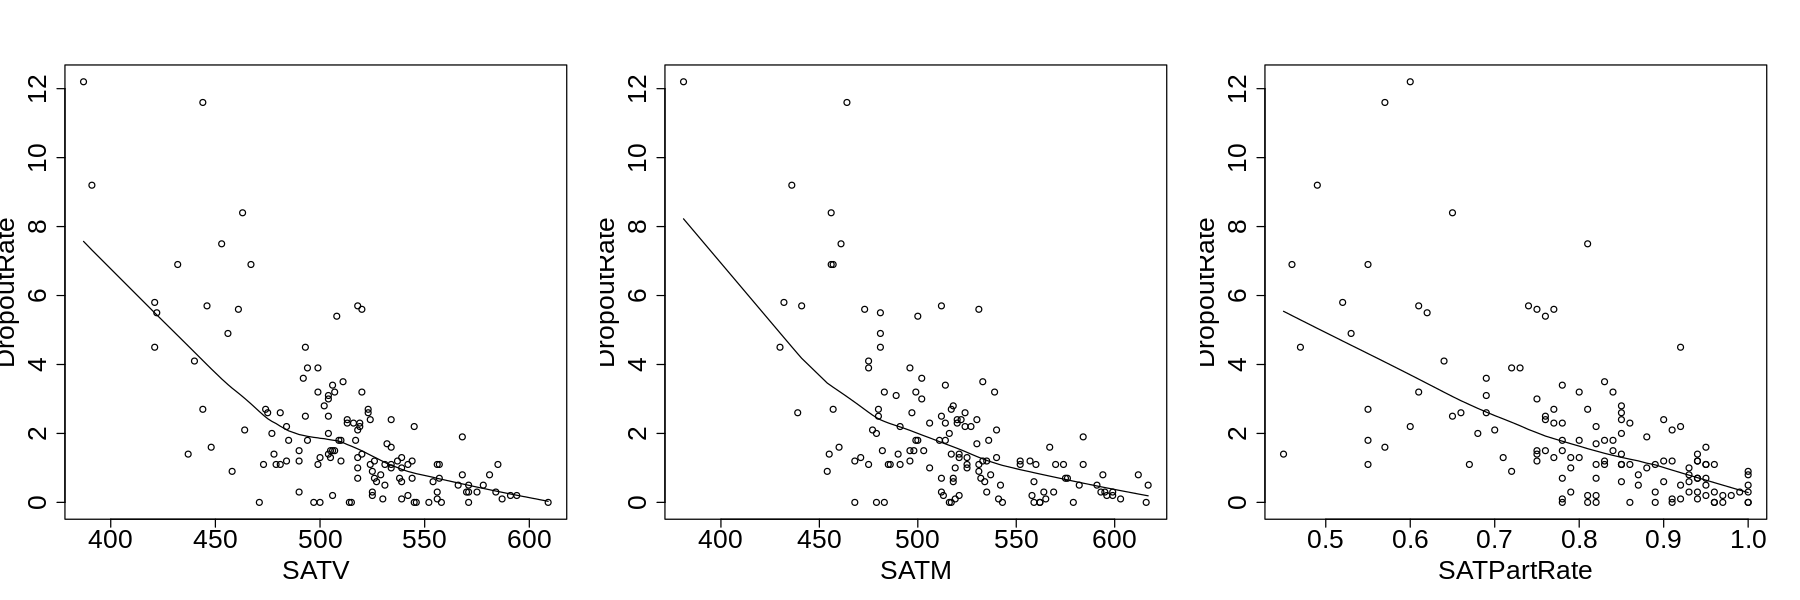

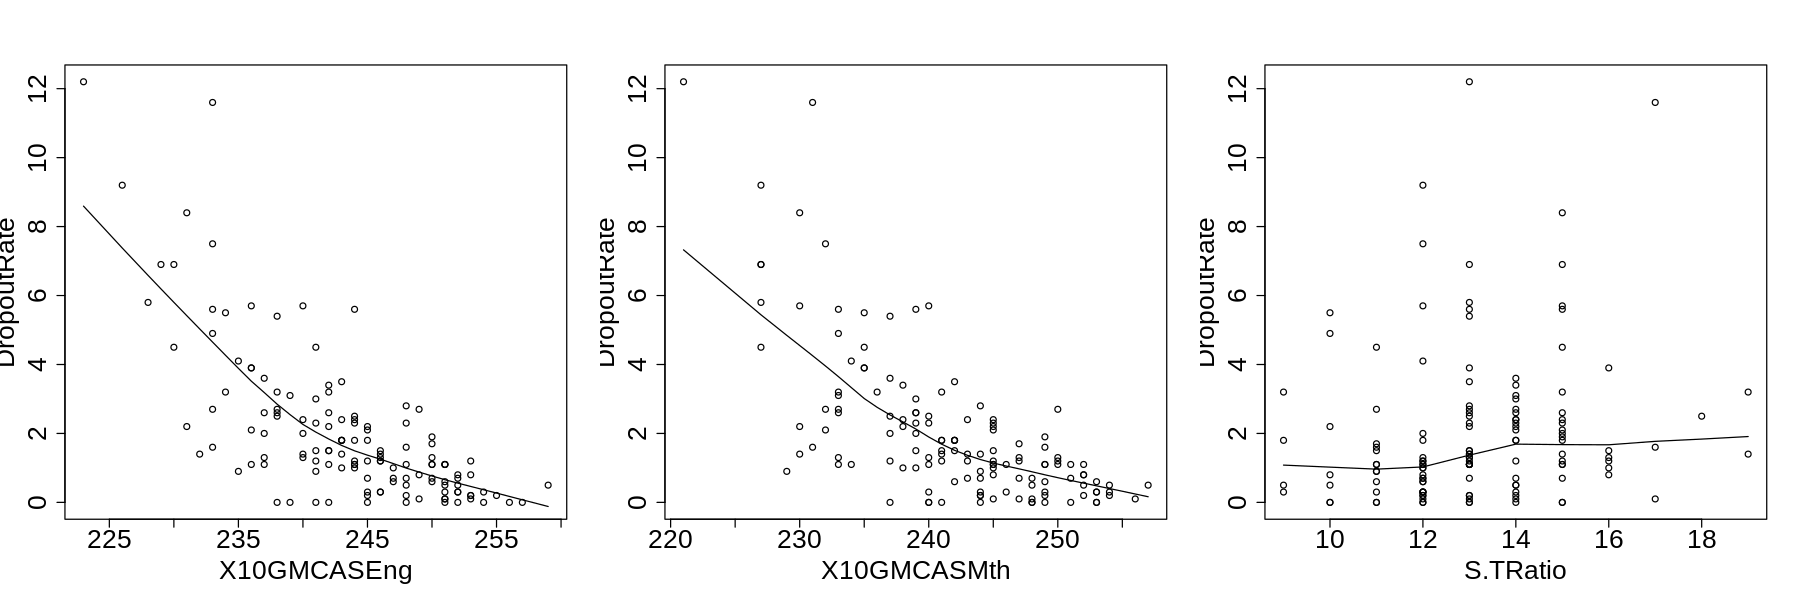

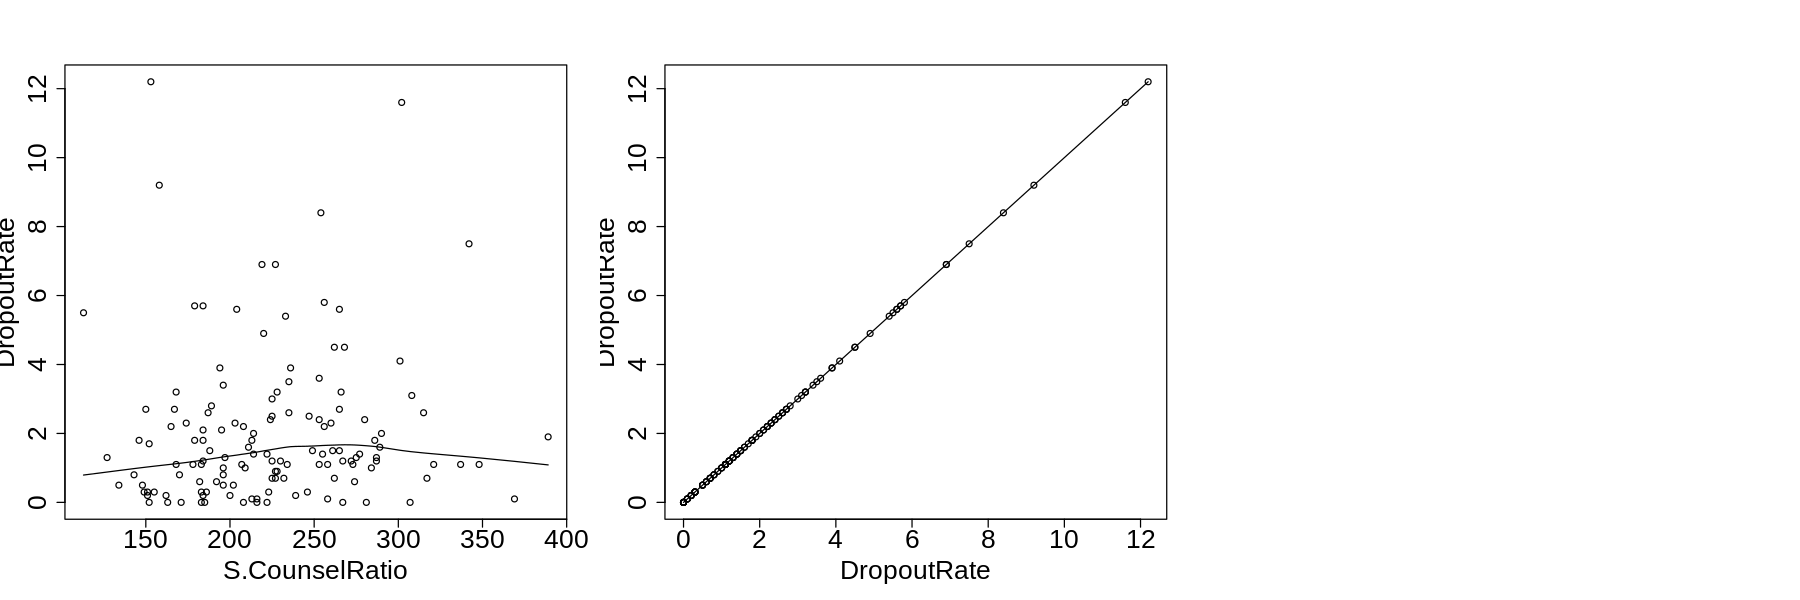

In [88]:
options(repr.plot.width=15, repr.plot.height=5)
par(mfrow=c(1, 3))  # create trellis/panels

plot_pairs(dat, yvar ="DropoutRate")

Warning message in warn_if_args_exist(list(...)):
“Extra arguments: 'binwidth' are being ignored.  If these are meant to be aesthetics, submit them using the 'mapping' variable within ggpairs with ggplot2::aes or ggplot2::aes_string.”


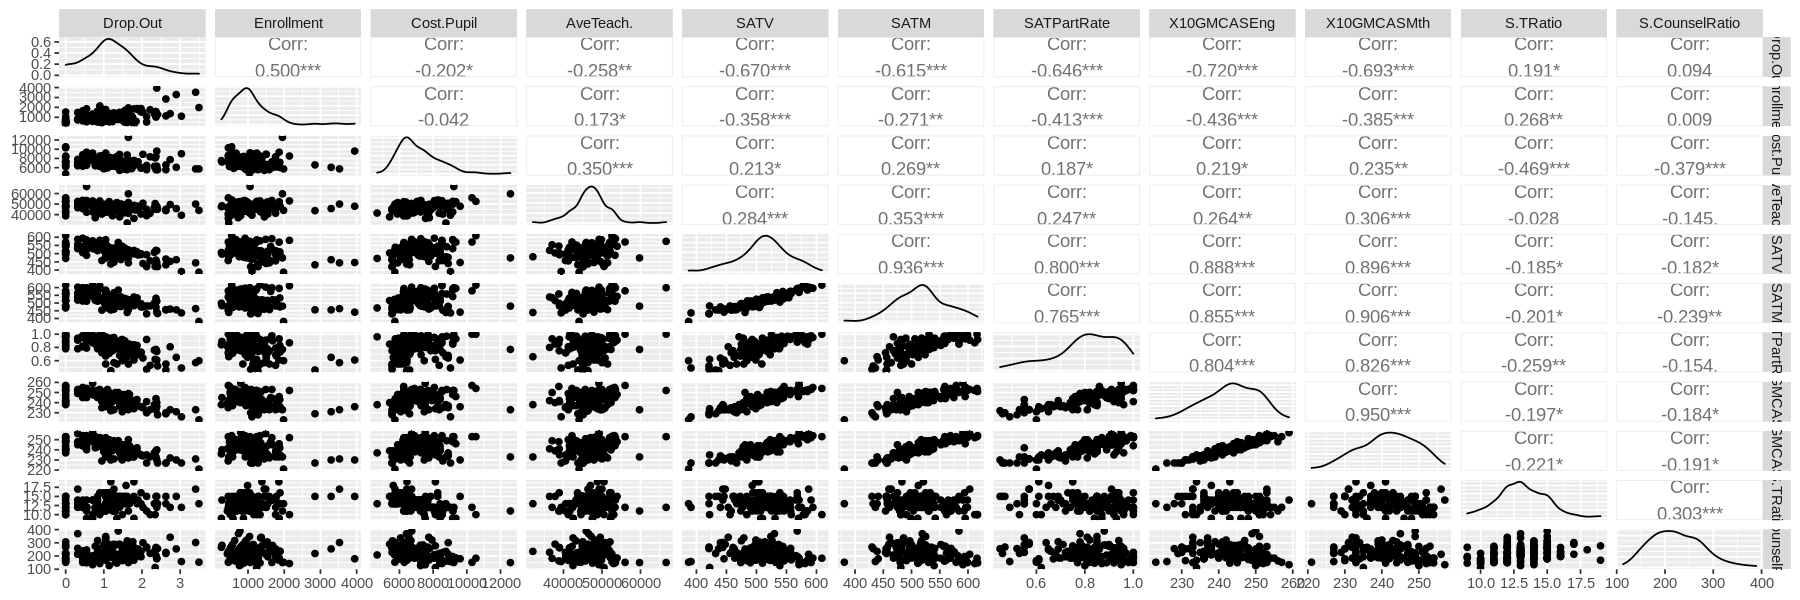

In [89]:
pairs_plot <- data.frame("Drop Out" = sqrt(data$DropoutRate),
                         "Enrollment" = data$Enrollment, 
                         "Cost/Pupil" = data$Cost.Pupil,
                         "AveTeach$" = data$AveTeach,
                         "SATV" = data$SATV,
                         "SATM" = data$SATM,
                         "SATPartRate" = data$SATPartRate,
                         "X10GMCASEng" = data$X10GMCASEng,
                         "X10GMCASMth" = data$X10GMCASMth ,
                         "S.TRatio" = data$S.TRatio ,
                         "S.CounselRatio" = data$S.CounselRatio
                         )

ggpairs(pairs_plot, binwidth=30)


## Assess normality of Response Variable

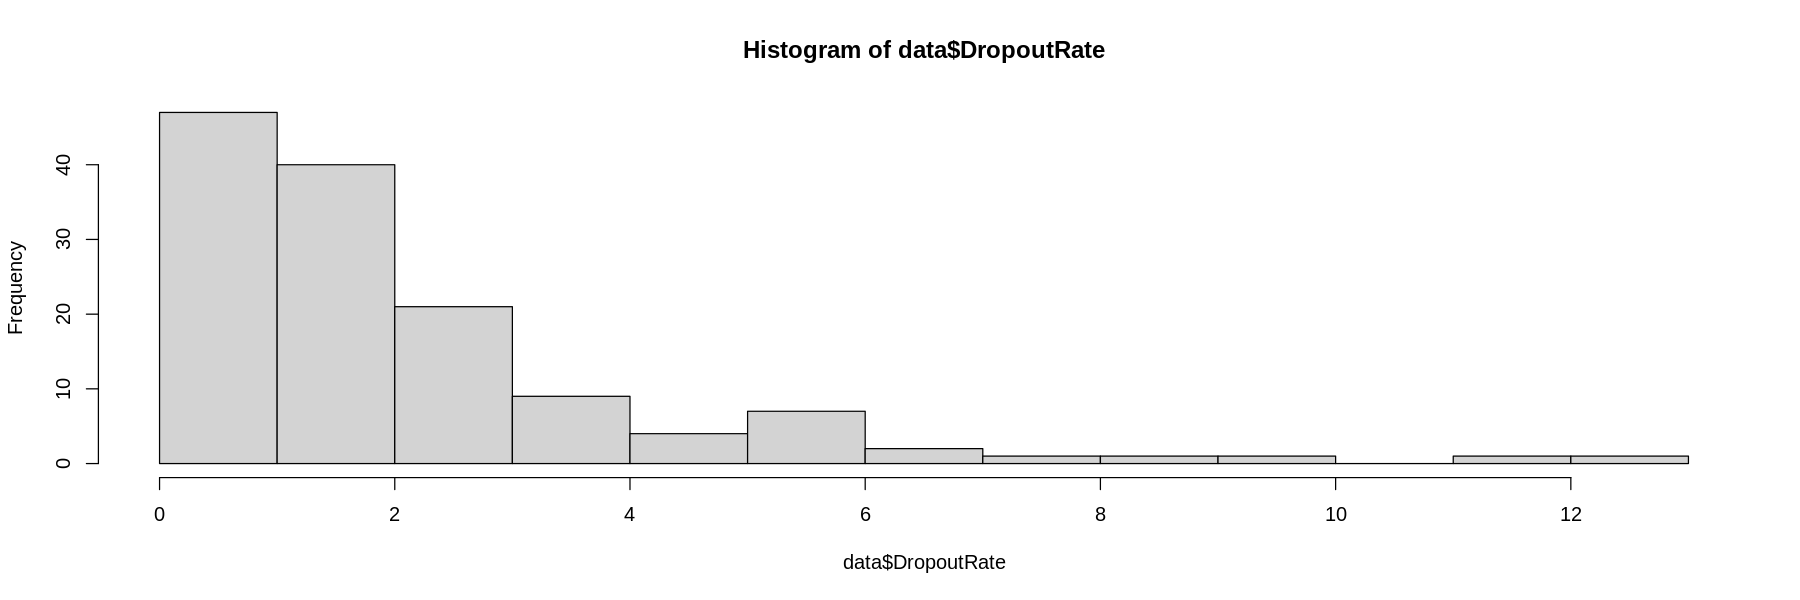

In [90]:
hist(data$DropoutRate)

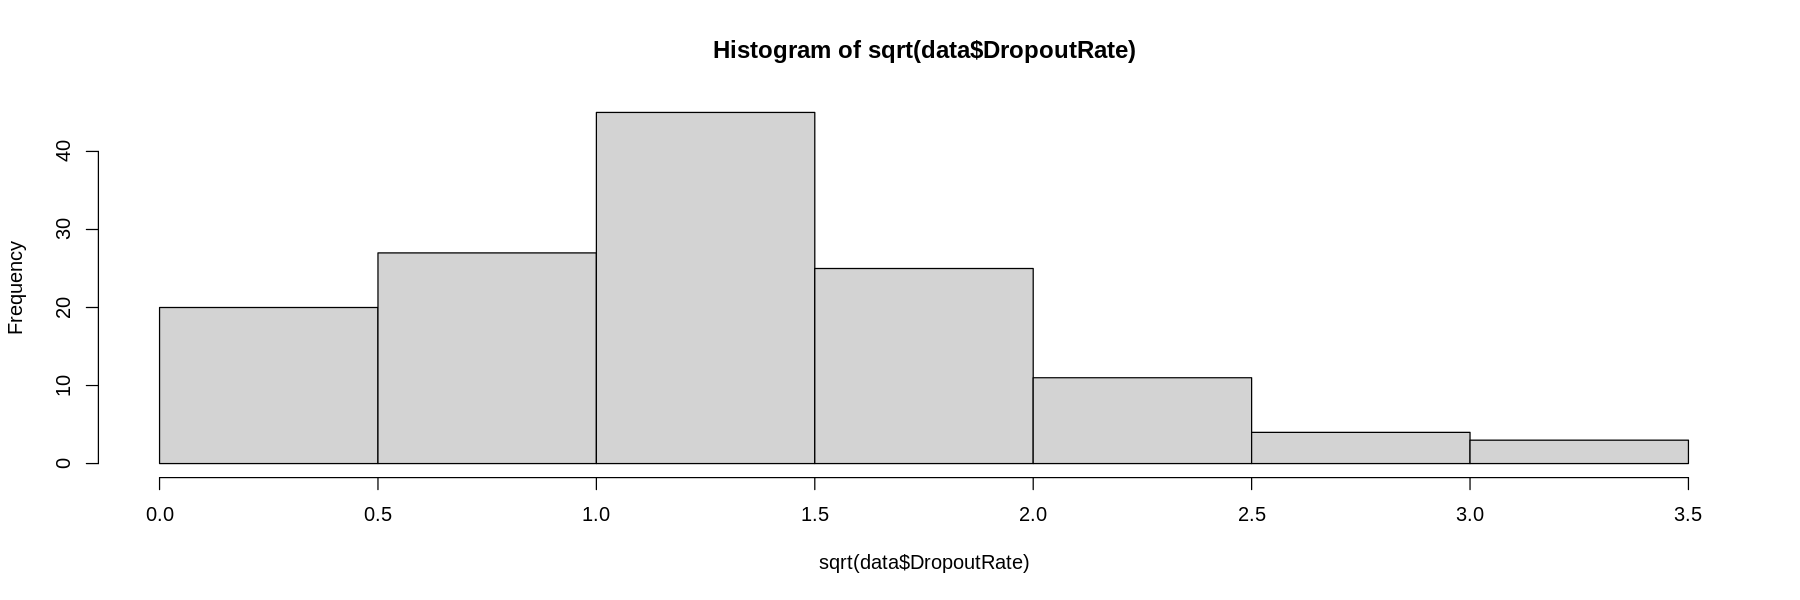

In [91]:
hist(sqrt(data$DropoutRate))

### If not normal, perform BoxCox:

In [99]:
lm(DropoutRate ~ Enrollment + SATV + SATM + S.CounselRatio, data = data)


Call:
lm(formula = DropoutRate ~ Enrollment + SATV + SATM + S.CounselRatio, 
    data = data)

Coefficients:
   (Intercept)      Enrollment            SATV            SATM  S.CounselRatio  
     16.245239        0.001351       -0.025619       -0.003999       -0.002148  


In [97]:
data[c(16, 132, 128, 125, 99, 91, 76, 69, 62, 32, 27),]

,School,Enrollment,Cost.Pupil,AveTeach.,SATV,SATM,SATPartRate,X10GMCASEng,X10GMCASMth,S.TRatio,S.CounselRatio,DropoutRate
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
16,16,1533,6245,52083,514,517,0.78,241,244,15,307,0
132,132,800,7300,47996,515,516,0.81,242,240,12,267,0
128,128,550,10537,52586,609,616,1.00,254,253,10,183,0
125,125,431,7349,46781,500,479,0.82,239,241,11,216,0
99,99,1041,4675,41498,471,468,0.96,238,237,13,208,0
91,91,556,8270,53921,545,543,0.91,248,248,15,185,0
76,76,281,7232,48410,497,483,0.89,245,240,14,281,0
69,69,666,6778,43385,552,562,0.97,252,249,13,222,0
62,62,488,6249,38809,546,559,0.86,256,248,11,163,0


In [100]:
df<-data[-c(16, 132, 128, 125, 99, 91, 76, 69, 62, 32, 27),]

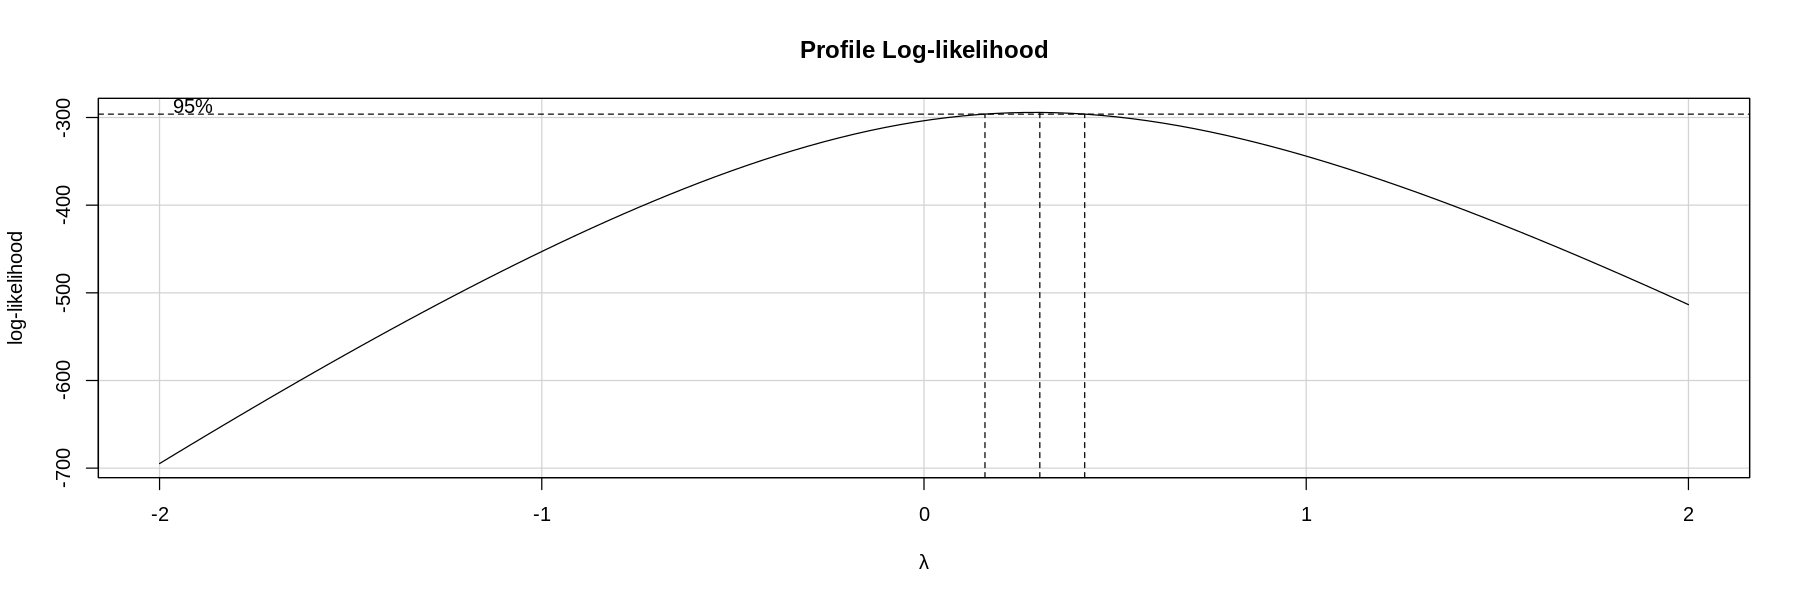

In [103]:
boxCox(lm(DropoutRate ~ Enrollment + SATV + SATM + S.CounselRatio, data = df))



Here are the appropriate transformations depending on the $\lambda$ values from BoxCox:

$\lambda = -3$: 1/y**3 

$\lambda = -2$: 1/ y**2 

$\lambda = -1$: 1/ y  

$\lambda = -0.5$ 1/sqrt(y) 

$\lambda = 0$  log(y)

$\lambda = 0.5$  sqrt(y)

$\lambda = 1$  y

$\lambda = 2$  y**2

$\lambda = 3$  y**3

[reference](https://www.statisticshowto.com/box-cox-transformation/)

Visualize applied transformation:


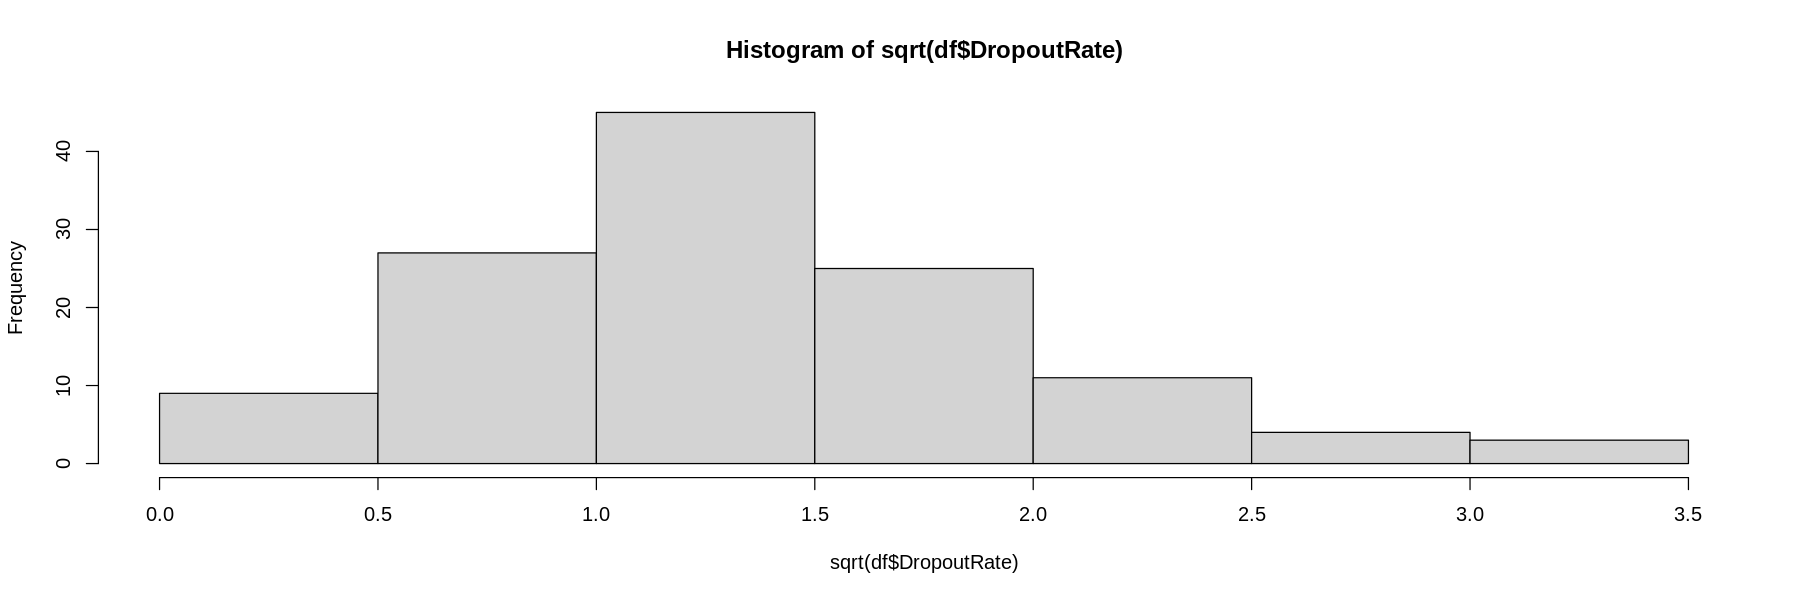

In [104]:
hist(sqrt(df$DropoutRate))

## Revisualize pairs_plot with transformations:

Warning message in warn_if_args_exist(list(...)):
“Extra arguments: 'binwidth' are being ignored.  If these are meant to be aesthetics, submit them using the 'mapping' variable within ggpairs with ggplot2::aes or ggplot2::aes_string.”


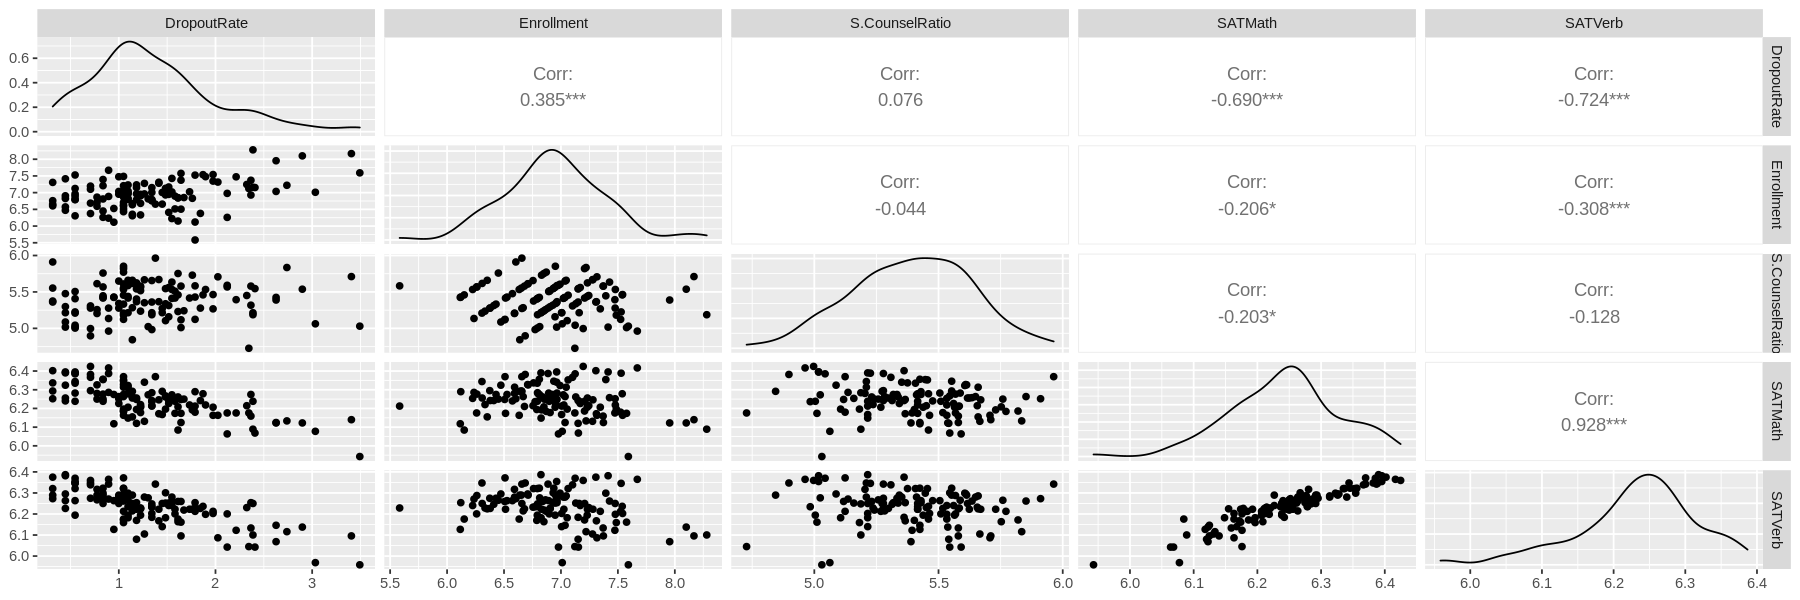

In [111]:
pairs_plot <- data.frame("DropoutRate" = sqrt(df$DropoutRate), ### ON THIS LINE CHANGE TRANSFORM
                         "Enrollment" = log(df$Enrollment), 
                         "S.CounselRatio" = log(df$S.CounselRatio),
                         "SATMath" = log(df$SATM),
                         "SATVerb" = log(df$SATV)
                         )

ggpairs(pairs_plot, binwidth=30)

## Rerun regression with transformed dependent:

In [115]:
response_transformed_fit <- lm(sqrt(DropoutRate) ~ log(Enrollment) + log(SATV) + log(SATM) + log(S.CounselRatio), data = df)
summary(response_transformed_fit)
### NOTE TRANSFORMATION ON RESPONSE


Call:
lm(formula = sqrt(DropoutRate) ~ log(Enrollment) + log(SATV) + 
    log(SATM) + log(S.CounselRatio), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.96316 -0.24556  0.00147  0.21912  1.15225 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         32.47903    3.66030   8.873 8.63e-15 ***
log(Enrollment)      0.29653    0.09743   3.044  0.00288 ** 
log(SATV)           -3.34427    1.35053  -2.476  0.01468 *  
log(SATM)           -1.92761    1.30106  -1.482  0.14110    
log(S.CounselRatio) -0.05821    0.17187  -0.339  0.73544    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4385 on 119 degrees of freedom
Multiple R-squared:  0.5619,	Adjusted R-squared:  0.5472 
F-statistic: 38.15 on 4 and 119 DF,  p-value: < 2.2e-16


We plot our `summary(fit)` in order to check against our needed MLR assumptions. Here we can check the following:
- $E(\epsilon_{i}) = 0$ 
- $Cov(\epsilon_{i}, \epsilon_{j}) = 0$
- $Var(\epsilon_{i}) = \sigma^2$

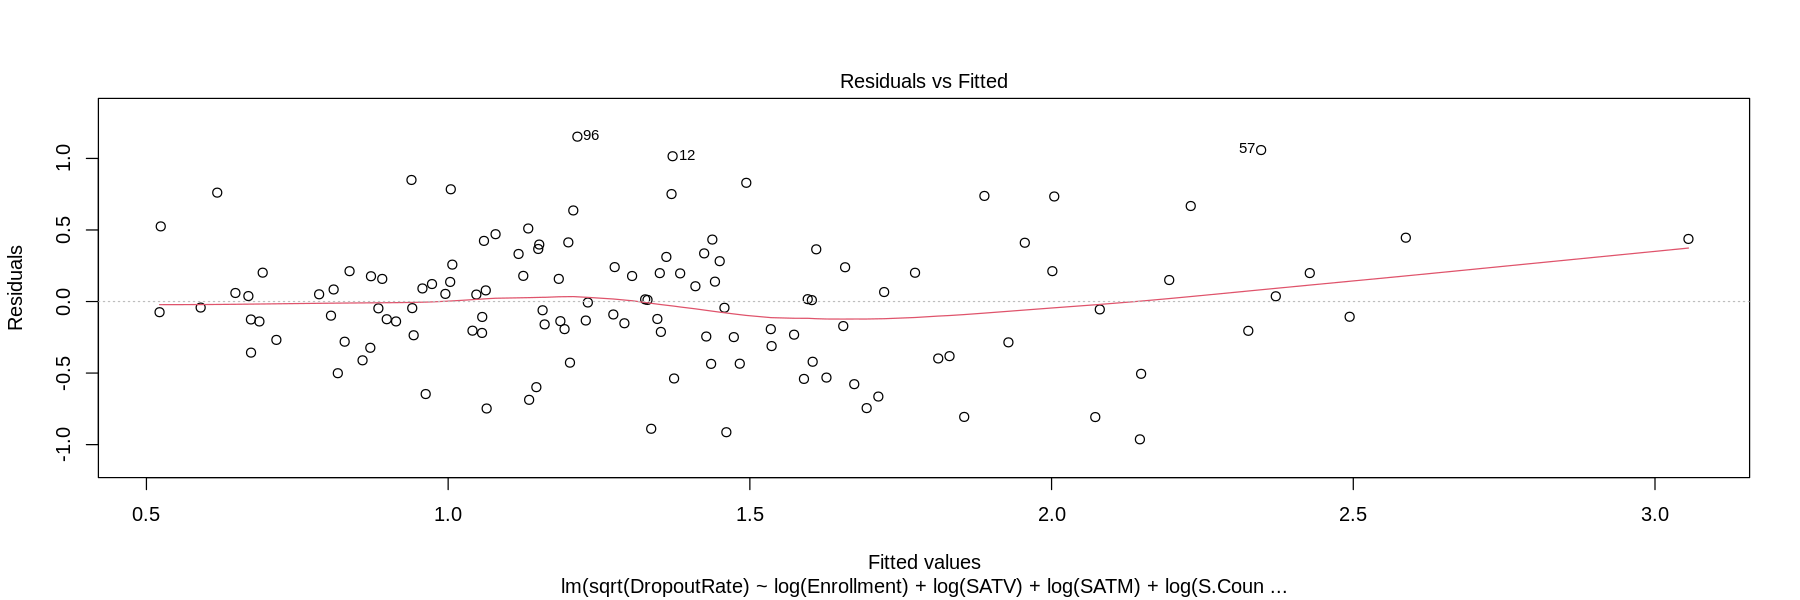

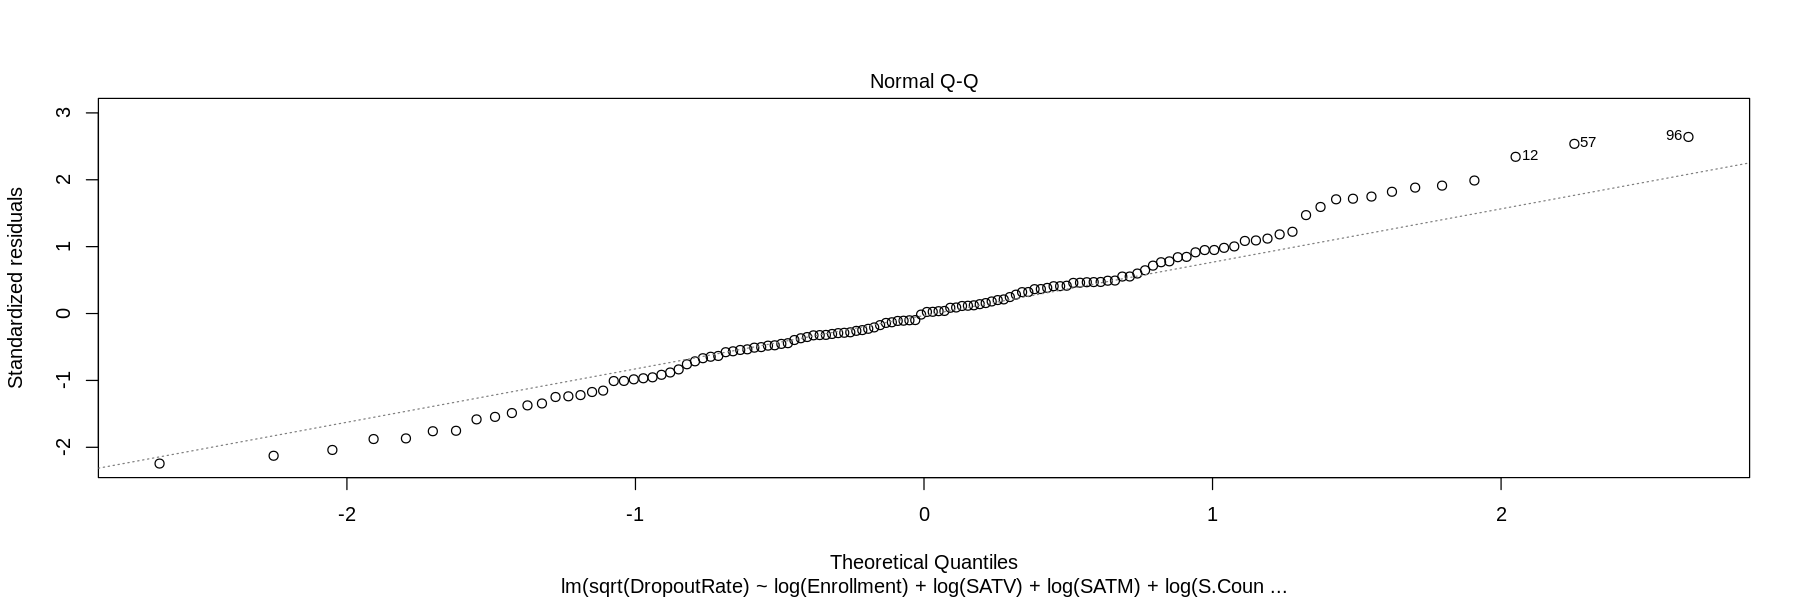

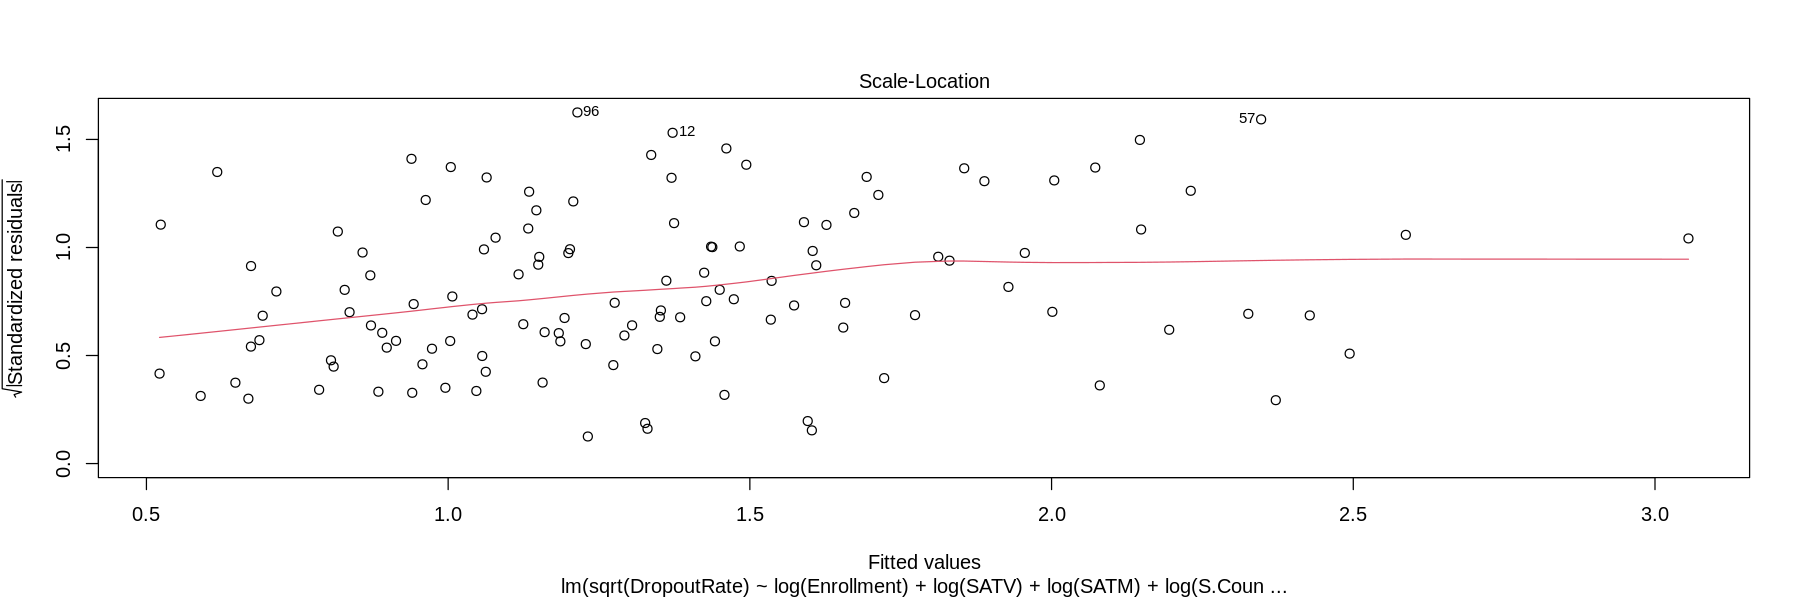

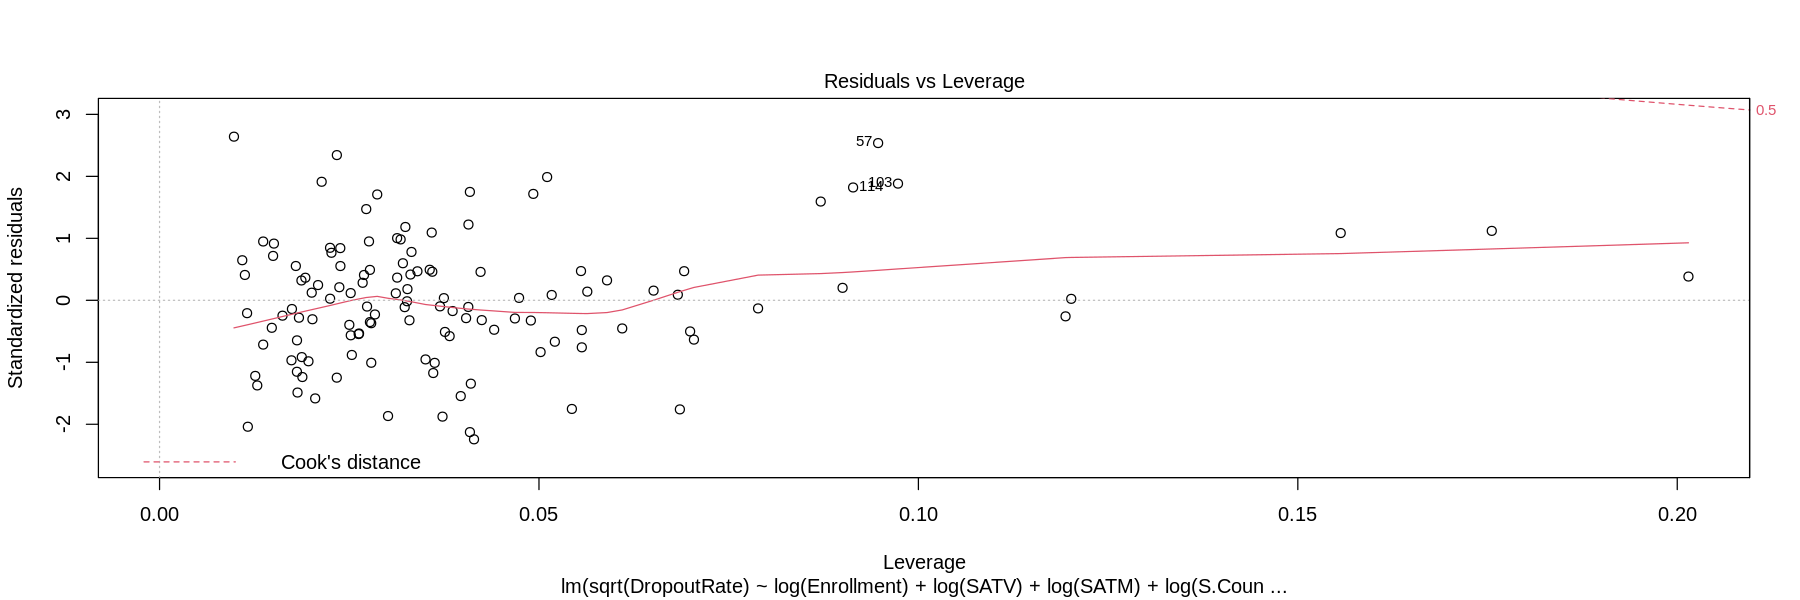

In [116]:
# Plot assumptions/residuals plots:

plot(response_transformed_fit)

## Rerun Pairs Plots to Assess Functional Relationships

In [ ]:
# pairs_plot <- data.frame("Response Variable" = data$response, ### ON THIS LINE CHANGE TRANSFORM
#                         "Explanatory 1" = data$explanatory1, 
#                         "Explanatory 2" = data$explanatory2,
#                         "Explanatory 3" = data$explanatory3,
#                         "Explanatory 4" = data$explanatory4
#                         )

#ggpairs(pairs_plot, binwidth=30)

Copy and paste above if applying transformations to EXPLANATORY and visualizing changes, to address functional relationship. 

Specifically, we need to make sure the explanatory variables express a `linear` relationship with the response.

**Redo above** for many iterations to find the best relationships with the response variable

## Rerun Regression Modeling WITH TRANSFORMATIONS

In [ ]:
# response_and_explanatory_fit <- lm(log(response) ~ explanatory1, log(explanatory2), explanatory3)
# summary(response_and_explanatory_fit)


In [ ]:
# plot(response_and_explanatory_fit)

## Use StepWise Regression to Find Best Model

In [ ]:
# From library(MASS), we use:

# AIC <- step(response_and_explanatory_fit)

Based on our stepwise regression, the model with the *lowest* AIC value will be our best model. We can choose to use the last regression provided by stepwise.

In [ ]:
# final_model <- lm(response ~ explanatory1, log(explanatory2), explanatory3)

# summary(final_model)

In [ ]:
# Now plot our final model to assess regression assumptions:

# plot(final_model)

Resource for how to read Linear Regression Plots [link](https://data.library.virginia.edu/diagnostic-plots/)

## Look for multicollinearity:

In [ ]:
# Use VIF (Variance Inflation Factor) to evaluate multicollinearity:

# vif(final_model)

We can use Variance Inflation Factor to evaluate multicollinearity:

- 1 = not correlated.
- Between 1 and 5 = moderately correlated.
- Greater than 5 = highly correlated.

## Now look for Outliers:

Throughout the regression process, we can evaluate the Cook's Distance plot (last plot of the `plot(lm())`. We can also use the Studentized Residuals Plot.

In [ ]:
# from library(olsrr):

# resid_plot<-ols_plot_resid_stud(final_model)
# head(resid_plot$data)

From here we investigate the specific outliers visualized from the above plot.

To investigate a specific **row**:

In [ ]:
# investigate row

# data[c(data_point_number),]

In [ ]:
# compare against summary of columns:

# summary(data)

In [ ]:
# create model without outlier:

# new_data <- data[-c(data_point_number),]

Repeat for each outlier, or do all at once.

## Create Final Model using data W/O Outliers

In [ ]:
# final_model_no_outliers <- lm(response ~ explanatory, data=new_data)

In [ ]:
# 

# plot(final_model_no_outliers)

In [ ]:
#  <- lm(log(response) ~ explanatory1, log(explanatory2), explanatory3)

# summary(response_and_explanatory_fit)
